<a href="https://colab.research.google.com/github/sauravrox/heart-fail-prediction/blob/master/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import pandas library
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from keras.utils import np_utils
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
#creating an empty dataframe for our dataset
df = pd.DataFrame()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Read Heart_s.csv dataset from local disk and copy it to df Dataframe
#df=pd.read_csv('./only_labels_simple.csv')
df=pd.read_csv('/content/drive/MyDrive/heart.csv')
#df2=pd.read_csv('./only_labels_simple -test.csv',encoding="ISO-8859–1")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.groupby('output').size()


output
0    138
1    165
dtype: int64

In [ ]:

# df=df.replace('died',0)
# df=df.replace('recovered',1)
# df=df.replace('stable',1)
# df=df.replace('severe',0)
# df['chronic_disease'].fillna(0,inplace = True)
df1=df
df2=df

In [ ]:
#check df Data set to make sure data is correct
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
#creating a list of numerical feature names

num_feat=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']


In [ ]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
numX= df[num_feat]

null_columns=numX.columns[numX.isnull().any()]
numX[null_columns].isnull().sum()


Series([], dtype: float64)

In [ ]:
#checking X matrix
numX=df[num_feat]
numX.head()



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:

y= df['output']



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(numX, y, test_size=0.3, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(212, 13)
(212,)
(91, 13)
(91,)


## Numerical features only

In [ ]:
#instantiate my_decisiontree, my_Logreg and KNN as object for Decision tree , Logestic Regression and Knn and set k to 5 
my_decisiontree=DecisionTreeClassifier()
my_logreg=LogisticRegression(max_iter=3000)
knn = KNeighborsClassifier(n_neighbors=5) 
svclassifier = SVC(kernel='linear', probability=True)
rftree = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

my_ANN = MLPClassifier(activation= 'logistic', alpha= 0.01, hidden_layer_sizes= [10,3], learning_rate='constant', random_state= 9, solver= 'adam',max_iter=2000,)



# train decision tree, logistic regression and knn algorithem
my_decisiontree.fit(X_train, y_train)
my_logreg.fit(X_train, y_train)
knn.fit(X_train, y_train) 
svclassifier.fit(X_train, y_train)
rftree.fit(X_train, y_train)
my_ANN.fit(X_train, y_train)
# fitted_model = model.fit(X_train_r, y_train_r, validation_split=0.30, batch_size=32, epochs=50, verbose=1)


# Testing on the testing set
y_predict_KNN = knn.predict(X_test)
y_predict_logreg = my_logreg.predict(X_test)
y_predict_dt = my_decisiontree.predict(X_test)
y_pred_svm = svclassifier.predict(X_test)
y_pred_RF = rftree.predict(X_test)
y_pred_ANN = my_ANN.predict(X_test)



# import accuracy_score function from scikit learn
from sklearn.metrics import accuracy_score

#calculate the accuracy
accuracy={}
accuracy ['KNN Accuracy']=accuracy_score(y_test, y_predict_KNN)
accuracy ['Logistic Regression Accuracy']=accuracy_score(y_test, y_predict_logreg)
accuracy ['Decision Tree Accuracy']=accuracy_score(y_test, y_predict_dt)
accuracy ['SVM Accuracy']=accuracy_score(y_test, y_pred_svm)
accuracy ['Random Forest Accuracy']=accuracy_score(y_test, y_pred_RF)
accuracy ['Neural Network Accuracy']=accuracy_score(y_test, y_pred_ANN)
# model.evaluate(X_test, y_test, verbose=1)

#print the accuracy
accuracy


{'Decision Tree Accuracy': 0.8571428571428571,
 'KNN Accuracy': 0.7142857142857143,
 'Logistic Regression Accuracy': 0.8681318681318682,
 'Neural Network Accuracy': 0.5494505494505495,
 'Random Forest Accuracy': 0.8791208791208791,
 'SVM Accuracy': 0.8571428571428571}

## ADD CATEGORICAL FEATURES

In [ ]:

features=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']


In [ ]:
X=df1[features]
y=df1['output']



In [ ]:
print(X.shape)
print(y.shape)


(303, 13)
(303,)


In [ ]:
#OneHotEncoding for the categorical features. each categorical feature will be replaced with dummy columns in the
#Matrix X
X=pd.get_dummies(X)
#check X Matrix 
X.head()
#####


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
print(X.shape)
print(y.shape)


(303, 13)
(303,)


In [ ]:
null_columns=X.columns[X.isnull().any()]
X[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
X_train=X
y_train=y


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
#import KneighborsClassifier, DecisionTree, and Logestic Regression class from scikit learn


#instantiate my_decisiontree, my_Logreg and KNN as object for Decision tree , Logestic Regression and Knn and set k to 5 
my_decisiontree=DecisionTreeClassifier(random_state=2)
my_logreg=LogisticRegressionCV(Cs=10,max_iter=2000,random_state=2)
knn = KNeighborsClassifier(n_neighbors=3) 
svclassifier = SVC(kernel='linear', probability=True)
rftree = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)

#my_ANN = MLPClassifier(activation= 'logistic', alpha= 0.01, hidden_layer_sizes= [100,10], learning_rate='constant', random_state= 5, solver= 'adam',max_iter=2000,)

my_ANN = MLPClassifier(activation= 'logistic', alpha= 0.01, hidden_layer_sizes= [40,30], learning_rate='constant', random_state= 9, solver= 'adam',max_iter=2000,)


# train decision tree, logistic regression and knn algorithem
my_decisiontree.fit(X_train, y_train)
my_logreg.fit(X_train, y_train)
knn.fit(X_train, y_train) 
svclassifier.fit(X_train, y_train)
rftree.fit(X_train, y_train)
my_ANN.fit(X_train, y_train)
# fitted_model = model.fit(X_train_r, y_train_r, validation_split=0.30, batch_size=32, epochs=50, verbose=1)


# Testing on the testing set
y_predict_KNN = knn.predict(X_test)
y_predict_logreg = my_logreg.predict(X_test)
y_predict_dt = my_decisiontree.predict(X_test)
y_pred_svm = svclassifier.predict(X_test)
y_pred_RF = rftree.predict(X_test)
y_pred_ANN = my_ANN.predict(X_test)



# import accuracy_score function from scikit learn
from sklearn.metrics import accuracy_score

#calculate the accuracy
accuracy={}
accuracy ['KNN Accuracy']=accuracy_score(y_test, y_predict_KNN)
accuracy ['Logistic Regression Accuracy']=accuracy_score(y_test, y_predict_logreg)
accuracy ['Decision Tree Accuracy']=accuracy_score(y_test, y_predict_dt)
accuracy ['SVM Accuracy']=accuracy_score(y_test, y_pred_svm)
accuracy ['Random Forest Accuracy']=accuracy_score(y_test, y_pred_RF)
accuracy ['Neural Network Accuracy']=accuracy_score(y_test, y_pred_ANN)
# model.evaluate(X_test, y_test, verbose=1)

#print the accuracy
accuracy

{'Decision Tree Accuracy': 0.8791208791208791,
 'KNN Accuracy': 0.7142857142857143,
 'Logistic Regression Accuracy': 0.8681318681318682,
 'Neural Network Accuracy': 0.7802197802197802,
 'Random Forest Accuracy': 0.8571428571428571,
 'SVM Accuracy': 0.8571428571428571}

In [ ]:
#[[10],[20],[30],[40],[50],[10,5],[20,10],[30,15],[40,35]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
#import KneighborsClassifier, DecisionTree, and Logestic Regression class from scikit learn


#instantiate my_decisiontree, my_Logreg and KNN as object for Decision tree , Logestic Regression and Knn and set k to 5 

my_ANN = MLPClassifier( alpha= 0.01, hidden_layer_sizes= [40,30], random_state= 9, max_iter=1000)


# train decision tree, logistic regression and knn algorithem
my_ANN.fit(X_train, y_train)
# fitted_model = model.fit(X_train_r, y_train_r, validation_split=0.30, batch_size=32, epochs=50, verbose=1)


# Testing on the testing set
y_pred_ANN = my_ANN.predict(X_test)



# import accuracy_score function from scikit learn
from sklearn.metrics import accuracy_score

#calculate the accuracy
accuracy={}
accuracy ['Neural Network Accuracy']=accuracy_score(y_test, y_pred_ANN)
# model.evaluate(X_test, y_test, verbose=1)

#print the accuracy
accuracy



{'Neural Network Accuracy': 0.7582417582417582}

### CROSS VALIDATION

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter_space = {
    'hidden_layer_sizes': [[10,5],[20,10],[30,20],[40,30],[50,40]],
    'activation': ['relu','logistic']}
mlp=MLPClassifier(max_iter=500,)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1)
clf.fit(X, y)
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'logistic', 'hidden_layer_sizes': [20, 10]}
0.789 (+/-0.067) for {'activation': 'relu', 'hidden_layer_sizes': [10, 5]}
0.769 (+/-0.099) for {'activation': 'relu', 'hidden_layer_sizes': [20, 10]}
0.729 (+/-0.069) for {'activation': 'relu', 'hidden_layer_sizes': [30, 20]}
0.785 (+/-0.072) for {'activation': 'relu', 'hidden_layer_sizes': [40, 30]}
0.802 (+/-0.126) for {'activation': 'relu', 'hidden_layer_sizes': [50, 40]}
0.805 (+/-0.133) for {'activation': 'logistic', 'hidden_layer_sizes': [10, 5]}
0.831 (+/-0.096) for {'activation': 'logistic', 'hidden_layer_sizes': [20, 10]}
0.802 (+/-0.109) for {'activation': 'logistic', 'hidden_layer_sizes': [30, 20]}
0.822 (+/-0.101) for {'activation': 'logistic', 'hidden_layer_sizes': [40, 30]}
0.815 (+/-0.138) for {'activation': 'logistic', 'hidden_layer_sizes': [50, 40]}


In [ ]:
c = 10
Accuracy_cv_AllFeat={}

In [ ]:

#my_logreg=LogisticRegressionCV(cv=10,max_iter=2000,random_state=3,solver='liblinear',fit_intercept=False)
my_logreg=LogisticRegressionCV(max_iter=2000,random_state=3,solver='liblinear',fit_intercept=False)
my_decisiontree=DecisionTreeClassifier(random_state=8)


Lg_Acc_List= cross_val_score(my_logreg,X,y,cv=c,scoring='accuracy')
Dt_Acc_List= cross_val_score(my_decisiontree,X,y,cv=c,scoring='accuracy')


Accuracy_cv_AllFeat['Decision Tree Accuracy using 10 fold cross_validation']=Dt_Acc_List.mean()
Accuracy_cv_AllFeat['Logistic Regression Accuracy using 10 fold cross_validation']=Lg_Acc_List.mean()
Accuracy_cv_AllFeat

{'Decision Tree Accuracy using 10 fold cross_validation': 0.781505376344086,
 'Logistic Regression Accuracy using 10 fold cross_validation': 0.8316129032258065}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3) 
KNN_Acc_List= cross_val_score(knn,X,y,cv=c,scoring='accuracy')
Accuracy_cv_AllFeat['KNN Accuracy using 10 fold cross_validation']=KNN_Acc_List.mean()
Accuracy_cv_AllFeat['KNN Accuracy using 10 fold cross_validation']
#8746

0.6272043010752688

In [ ]:
#my_ANN = MLPClassifier(activation= 'logistic', alpha= 0.05, hidden_layer_sizes= [50], learning_rate='constant', random_state= 7, solver= 'adam',max_iter=1000,)
#my_ANN = MLPClassifier(activation= 'tanh', alpha= 0.001, hidden_layer_sizes= (40), learning_rate='constant', random_state= 5, solver= 'sgd',max_iter=3000,)
#my_ANN = MLPClassifier(activation= 'logistic', alpha= 0.05, hidden_layer_sizes= (10), learning_rate='constant', random_state= 1, solver= 'adam',max_iter=3000,)


my_ANN = MLPClassifier(activation= 'logistic', alpha= 0.01, hidden_layer_sizes= [40,30], learning_rate='constant', random_state= 9, solver= 'adam',max_iter=2000,)
NN_Acc_List= cross_val_score(my_ANN,X,y,cv=10,scoring='accuracy')
Accuracy_cv_AllFeat['Neural Network Accuracy using 10 fold cross_validation']=NN_Acc_List.mean()
Accuracy_cv_AllFeat['Neural Network Accuracy using 10 fold cross_validation']
#8966
#8885 10,5 log


0.8248387096774193

In [ ]:
svclassifier = SVC(kernel='linear', probability=True,random_state=8)
svm_Acc_List= cross_val_score(svclassifier,X,y,cv=c,scoring='accuracy',verbose=1,n_jobs=-1)
Accuracy_cv_AllFeat['SVM Accuracy using 10 fold cross_validation']=svm_Acc_List.mean()
Accuracy_cv_AllFeat['SVM Accuracy using 10 fold cross_validation']

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   26.2s finished


0.8348387096774192

In [ ]:
rftree = RandomForestClassifier(n_estimators = 20, bootstrap = True, random_state=5 )
rf_Acc_List= cross_val_score(rftree,X,y,cv=c,scoring='accuracy',n_jobs=-1,verbose=1)
Accuracy_cv_AllFeat['Random Forest Accuracy using 10 fold cross_validation']=rf_Acc_List.mean()
Accuracy_cv_AllFeat['Random Forest Accuracy using 10 fold cross_validation']

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished


0.8084946236559141

### AUC


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
# my_ANN = MLPClassifier(activation= 'tanh', alpha= 0.001, hidden_layer_sizes= (40), learning_rate='constant', 
#                        random_state= 5, solver= 'sgd',max_iter=3000)
my_logreg=LogisticRegressionCV(max_iter=2000,random_state=3,solver='liblinear',fit_intercept=False)
my_decisiontree=DecisionTreeClassifier(random_state=4)
knn = KNeighborsClassifier(n_neighbors=3) 
my_ANN = MLPClassifier(activation= 'logistic', alpha= 0.01, hidden_layer_sizes= [40,30], learning_rate='constant', random_state= 9, solver= 'adam',max_iter=2000)
svclassifier = SVC(kernel='linear', probability=True,random_state=3)
rftree = RandomForestClassifier(n_estimators = 20, bootstrap = True, random_state=5)



my_decisiontree.fit(X_train, y_train)
my_logreg.fit(X_train, y_train)
knn.fit(X_train, y_train) 
svclassifier.fit(X_train, y_train)
rftree.fit(X_train, y_train)
my_ANN.fit(X_train, y_train)

# Predicting the Binary Label:
y_predict_lr = my_logreg.predict(X_test)
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test)

# lr_probs =my_logreg.predict_proba(X_test)
# rf_probs = rftree.predict_proba(X_test)[:, 1]
# svm_proba = svclassifier.predict_proba(X_test)
# knn_proba = knn.predict_proba(X_test)
# my_decisiontree_Proba = my_decisiontree.predict_proba(X_test)
# my_ANN_proba = my_ANN.predict_proba(X_test)

my_ANN_proba=cross_val_predict(my_ANN, X, y, cv=10,method='predict_proba')
rf_probs=cross_val_predict(rftree, X, y, cv=10,method='predict_proba')
svm_proba=cross_val_predict(svclassifier, X, y, cv=10,method='predict_proba')
lr_probs=cross_val_predict(my_logreg, X, y, cv=10,method='predict_proba')
knn_proba=cross_val_predict(knn, X, y, cv=10,method='predict_proba')
my_decisiontree_Proba=cross_val_predict(my_decisiontree, X, y, cv=10,method='predict_proba')




In [ ]:
# This line prints the "estimated likelihood of both label" for the testing set:

print (len(lr_probs))
print("Logistic Regression")
print("Mortality Rate","Survival Rate")
print(lr_probs)

print("SVM")
print("Mortality Rate","Survival Rate")
print(svm_proba)

print("KNN")
print("Mortality Rate","Survival Rate")
print(knn_proba)

print("Decission Tree")
print("Mortality Rate","Survival Rate")
print(my_decisiontree_Proba)

print("Random Forest")
print("Mortality Rate","Survival Rate")
print(rf_probs)

print("Neural Network")
print("Mortality Rate","Survival Rate")
print(my_ANN_proba)



303
Logistic Regression
Mortality Rate Survival Rate
[[0.18167066 0.81832934]
 [0.33545003 0.66454997]
 [0.10915553 0.89084447]
 [0.09165459 0.90834541]
 [0.19949382 0.80050618]
 [0.27599175 0.72400825]
 [0.2451033  0.7548967 ]
 [0.16046058 0.83953942]
 [0.25022872 0.74977128]
 [0.10939316 0.89060684]
 [0.40109917 0.59890083]
 [0.05267678 0.94732322]
 [0.13308683 0.86691317]
 [0.21001823 0.78998177]
 [0.03598089 0.96401911]
 [0.06763738 0.93236262]
 [0.01544934 0.98455066]
 [0.38563176 0.61436824]
 [0.39839377 0.60160623]
 [0.13058485 0.86941515]
 [0.54777276 0.45222724]
 [0.09122474 0.90877526]
 [0.17231405 0.82768595]
 [0.55428925 0.44571075]
 [0.15711202 0.84288798]
 [0.2507619  0.7492381 ]
 [0.21429874 0.78570126]
 [0.1656911  0.8343089 ]
 [0.13710349 0.86289651]
 [0.38397175 0.61602825]
 [0.04200658 0.95799342]
 [0.47359412 0.52640588]
 [0.07296041 0.92703959]
 [0.43078346 0.56921654]
 [0.60037291 0.39962709]
 [0.28777396 0.71222604]
 [0.00996021 0.99003979]
 [0.36829994 0.6317000

In [ ]:
my_ANN_proba[0:15]

array([[0.1734689 , 0.8265311 ],
       [0.28839315, 0.71160685],
       [0.09957905, 0.90042095],
       [0.10016041, 0.89983959],
       [0.24636701, 0.75363299],
       [0.50208097, 0.49791903],
       [0.29772408, 0.70227592],
       [0.12764516, 0.87235484],
       [0.55310515, 0.44689485],
       [0.1844995 , 0.8155005 ],
       [0.42165902, 0.57834098],
       [0.08612366, 0.91387634],
       [0.12450228, 0.87549772],
       [0.17937662, 0.82062338],
       [0.05603323, 0.94396677]])

[Text(1, 0, '0%'), Text(1, 0, '100%')]

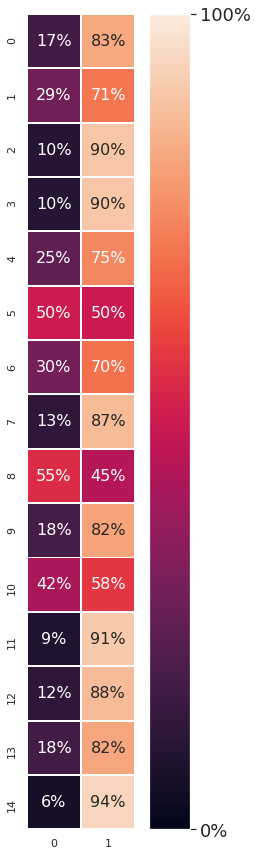

In [ ]:
import numpy as np;
import seaborn as sns; sns.set()
import matplotlib

plt.subplots(figsize=(5,15))

matplotlib.rc('xtick', labelsize=30)

matplotlib.rc('ytick', labelsize=18)

uniform_data = my_ANN_proba[0:15]
#uniform_data = my_ANN_proba
ax = sns.heatmap(uniform_data,annot=True, fmt='.0%', cbar=False, vmin=0, annot_kws={"size": 16}, vmax=1,square=1, linewidth=1.)
cbar = ax.figure.colorbar(ax.collections[0])
cbar.set_ticks([0, 1])
cbar.ax.set_yticklabels(['0%','100%'])

In [ ]:
y_predict_prob_lr[0:15]

array([[0.32256198, 0.67743802],
       [0.31644332, 0.68355668],
       [0.3831079 , 0.6168921 ],
       [0.0684053 , 0.9315947 ],
       [0.97443714, 0.02556286],
       [0.79920268, 0.20079732],
       [0.24398416, 0.75601584],
       [0.22462248, 0.77537752],
       [0.93043464, 0.06956536],
       [0.18857394, 0.81142606],
       [0.90656979, 0.09343021],
       [0.13387445, 0.86612555],
       [0.87524027, 0.12475973],
       [0.89277809, 0.10722191],
       [0.01842566, 0.98157434]])

In [ ]:
lr_probs

array([[0.18167066, 0.81832934],
       [0.33545003, 0.66454997],
       [0.10915553, 0.89084447],
       [0.09165459, 0.90834541],
       [0.19949382, 0.80050618],
       [0.27599175, 0.72400825],
       [0.2451033 , 0.7548967 ],
       [0.16046058, 0.83953942],
       [0.25022872, 0.74977128],
       [0.10939316, 0.89060684],
       [0.40109917, 0.59890083],
       [0.05267678, 0.94732322],
       [0.13308683, 0.86691317],
       [0.21001823, 0.78998177],
       [0.03598089, 0.96401911],
       [0.06763738, 0.93236262],
       [0.01544934, 0.98455066],
       [0.38563176, 0.61436824],
       [0.39839377, 0.60160623],
       [0.13058485, 0.86941515],
       [0.54777276, 0.45222724],
       [0.09122474, 0.90877526],
       [0.17231405, 0.82768595],
       [0.55428925, 0.44571075],
       [0.15711202, 0.84288798],
       [0.2507619 , 0.7492381 ],
       [0.21429874, 0.78570126],
       [0.1656911 , 0.8343089 ],
       [0.13710349, 0.86289651],
       [0.38397175, 0.61602825],
       [0.

In [ ]:
from sklearn import metrics

# fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_probs[:,1], pos_label=1)
# fprs, tprs, thresholds = metrics.roc_curve(y_test, svm_proba[:,1], pos_label=1)
# fprk, tprk, thresholds = metrics.roc_curve(y_test, knn_proba[:,1], pos_label=1)
# fprf, tprf, thresholds = metrics.roc_curve(y_test, rf_probs, pos_label=1)
# fprd, tprd, thresholds = metrics.roc_curve(y_test, my_decisiontree_Proba[:,1], pos_label=1)
# fprn, tprn, thresholds = metrics.roc_curve(y_test, my_ANN_proba[:,1], pos_label=1)

fpr, tpr, thresholds = metrics.roc_curve(y, lr_probs[:,1], pos_label=1)
fprs, tprs, thresholds = metrics.roc_curve(y, svm_proba[:,1], pos_label=1)
fprk, tprk, thresholds = metrics.roc_curve(y, knn_proba[:,1], pos_label=1)
fprf, tprf, thresholds = metrics.roc_curve(y, rf_probs[:,1], pos_label=1)
fprd, tprd, thresholds = metrics.roc_curve(y, my_decisiontree_Proba[:,1], pos_label=1)
fprn, tprn, thresholds = metrics.roc_curve(y, my_ANN_proba[:,1], pos_label=1)



print(fpr)
print(tpr)

[0.         0.         0.         0.00724638 0.00724638 0.01449275
 0.01449275 0.02173913 0.02173913 0.02898551 0.02898551 0.03623188
 0.03623188 0.05072464 0.05072464 0.05797101 0.05797101 0.06521739
 0.06521739 0.07246377 0.07246377 0.08695652 0.08695652 0.10144928
 0.10144928 0.11594203 0.11594203 0.12318841 0.12318841 0.13043478
 0.13043478 0.15942029 0.15942029 0.16666667 0.16666667 0.18115942
 0.18115942 0.19565217 0.19565217 0.20289855 0.20289855 0.2173913
 0.2173913  0.22463768 0.22463768 0.24637681 0.24637681 0.25362319
 0.25362319 0.26811594 0.26811594 0.28985507 0.28985507 0.30434783
 0.30434783 0.33333333 0.33333333 0.42753623 0.42753623 0.43478261
 0.43478261 0.5        0.5        0.52898551 0.52898551 0.55797101
 0.55797101 0.5942029  0.5942029  0.67391304 0.67391304 0.73188406
 0.73188406 1.        ]
[0.         0.00606061 0.18787879 0.18787879 0.26060606 0.26060606
 0.33333333 0.33333333 0.36969697 0.36969697 0.37575758 0.37575758
 0.46060606 0.46060606 0.48484848 0.484

In [ ]:
# AUC:
AUCl = metrics.auc(fpr, tpr)
AUCs = metrics.auc(fprs, tprs)
AUCk = metrics.auc(fprk, tprk)
AUCf = metrics.auc(fprf, tprf)
AUCd = metrics.auc(fprd, tprd)
AUCn = metrics.auc(fprn, tprn)

print(AUCl,AUCs,AUCk,AUCf,AUCd,AUCn)


0.8996925779534476 0.9009661835748792 0.6449055775142731 0.8909969257795345 0.7574440052700921 0.8877470355731225


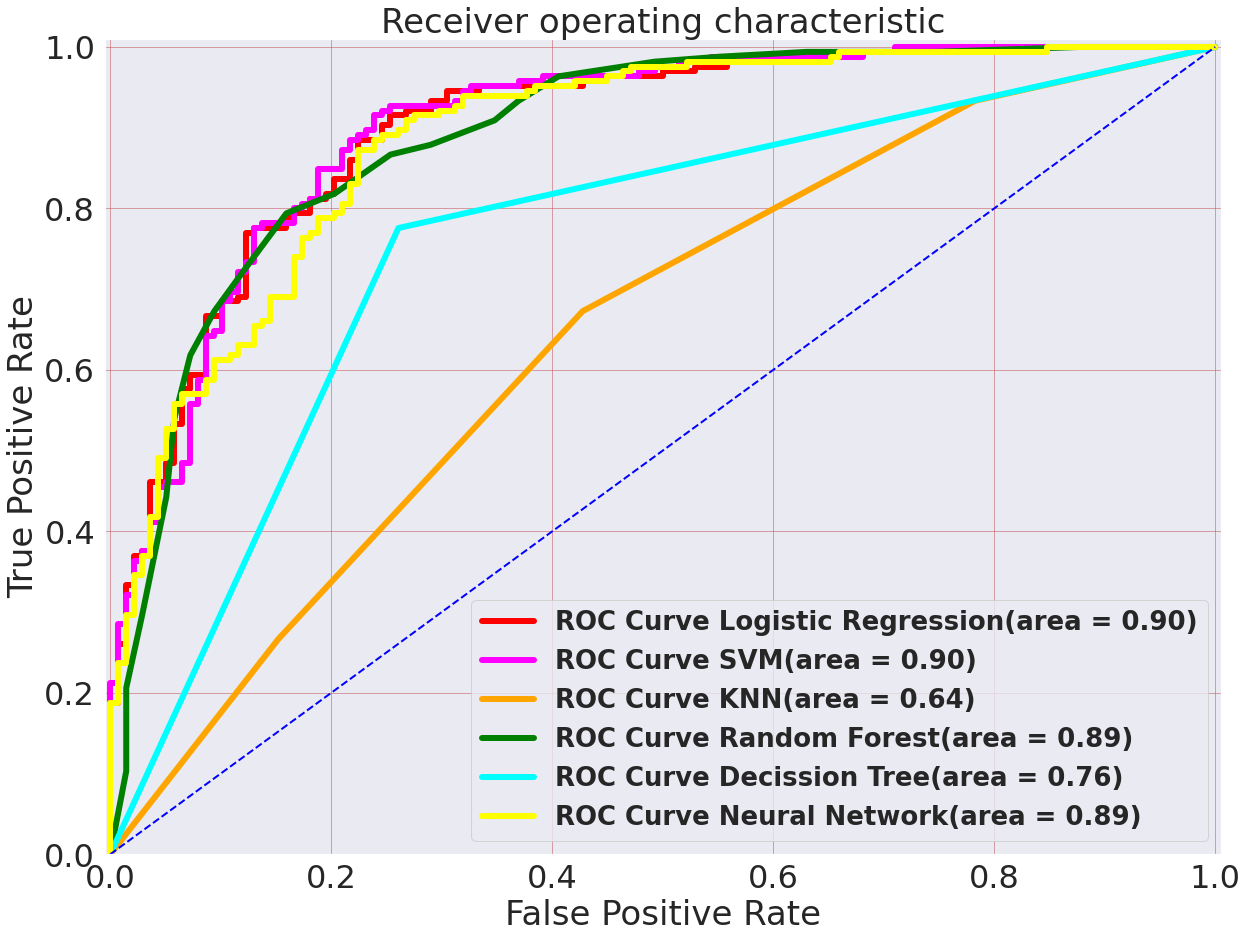

In [ ]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:

import matplotlib.pyplot as plt


rc={'axes.labelsize': 34, 'font.size': 34, 'legend.fontsize': 34.0, 'axes.titlesize': 34}
plt.rcParams.update(**rc)

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

fig, ax=plt.subplots(figsize=(20,15))

ax.tick_params(direction='out', length=6, width=2, labelsize=32,
               grid_color='r', grid_alpha=0.5)
# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=6, 
         label='ROC Curve Logistic Regression(area = %0.2f)' % AUCl)

plt.plot(fprs, tprs, color='Magenta', lw=6, 
         label='ROC Curve SVM(area = %0.2f)' % AUCs)

plt.plot(fprk, tprk, color='Orange', lw=6, 
         label='ROC Curve KNN(area = %0.2f)' % AUCk)

plt.plot(fprf, tprf, color='Green', lw=6, 
         label='ROC Curve Random Forest(area = %0.2f)' % AUCf)

plt.plot(fprd, tprd, color='cyan', lw=6, 
         label='ROC Curve Decission Tree(area = %0.2f)' % AUCd)

plt.plot(fprn, tprn, color='yellow', lw=6, 
         label='ROC Curve Neural Network(area = %0.2f)' % AUCn)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right",prop={'size':20},fontsize=32,handlelength=12,handleheight=2)
plt.legend(loc=4, prop={'size': 26,'weight':'bold','style':'normal'})
plt.savefig("AUC Comparison v2",dpi=300)

plt.show()